In this workbook, I have built models to predict the housing prices using the Kaggle housing price dataset  

Using just linear regression with ridge and lasso regularisation, I was able to get on top 20% in the leaderboard. 

In [ ]:

%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_columns',None)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
## Load train data
train = pd.read_csv("train.csv")
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
# Check Duplicates in train
Unique = len(set(train.Id))
Total = train.shape[0]
Dupli = Total - Unique
print("There are " + str(Dupli) + " duplicate IDs for " + str(Total) + " total entries")
# Drop Id column
train.drop("Id", axis = 1, inplace = True)

There are 0 duplicate IDs for 1460 total entries


# EDA on Train Data
- Distribution of the Target Variable "SalePrice"
- Correlation matrix of all numerical features
- Correlation matrix of top 10
- Scatterplot for SalePrice vs GRLvArea to indentify the outliers (As per data desc - there are 4 outliers)


In [ ]:
## Shape of the Data
print(f"Shape of the train is {train.shape}")

Shape of the train is (1460, 80)


**Target variables distribution**

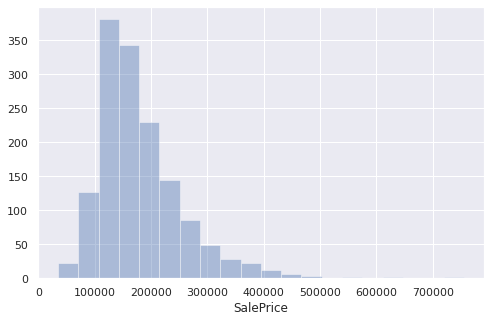

In [ ]:
sns.set(rc={'figure.figsize':(8,5)})
sns.distplot(train['SalePrice'], kde=False, bins=20)
plt.show()

**Correlation of Numerical Features**

In [ ]:
num_features = train.select_dtypes(include=np.number)
correlation = num_features.corr()
cor_salesprice = correlation['SalePrice']

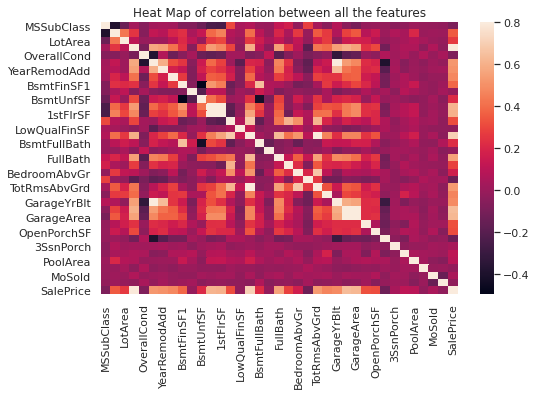

In [ ]:
## Heat Map of all features correlation
plt.title("Heat Map of correlation between all the features")
sns.heatmap(correlation, vmax=0.8)
plt.show()

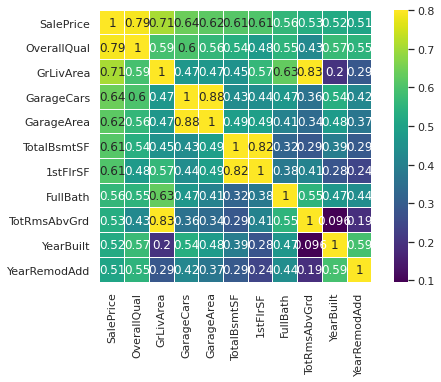

In [ ]:
## Heatmap of feature with High correlations
k = 11
cols = correlation.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].to_numpy().T)
sns.heatmap(cm, vmax=0.8, linewidths=0.01, square=True, annot=True, cmap='viridis', linecolor="white", \
            xticklabels=cols.values, yticklabels=cols.values)
plt.show()

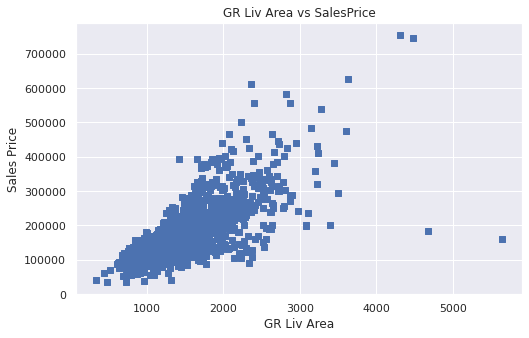

In [ ]:
# Outliers between SalesPrice and GRLIVArea (As it is indicated in  data description)
# Scatter Plot
fig = plt.figure(figsize=(8,5))
plt.scatter(train.GrLivArea,train.SalePrice, marker='s')
plt.title("GR Liv Area vs SalesPrice")
plt.xlabel("GR Liv Area")
plt.ylabel("Sales Price")
plt.show()


# Pre Processing
- Filter the train data to remove the outliers in SalesPrice vs GR Liv Area
- Anlayse the Missing data in Train and Test set 
- Fill the missing values in Train and Test set
- Drop 'Id' and 'SalePrice' from Train and 'Id' from Test dataset
____________________________________________________

**--Feature Engineering on Numerical Features--**

1) Create Ploynomial (degree 3) features for the top 15 correlated features

2) To handle the skewness of the numerical features, appy log transformation to all the numerical features with skewness more than 0.1

3) Standardize all the numerical features 


**--Feature Engineering on Categorical Features--**

1) Grouping of few categories

2) Dummy Variable creation 

_______________________________________________________


**Remove Outliers in based on SalesPrice vs GRLivArea scatterplot**

In [ ]:
## There are two outlier which should be removed .. As per the recommendation in data description
# we should remove all data with GR Liv Area more than 4000
train = train[train.GrLivArea < 4000]
train.reset_index(inplace=True,drop=True)
y = train['SalePrice']

**Missing data in train and test dataset**

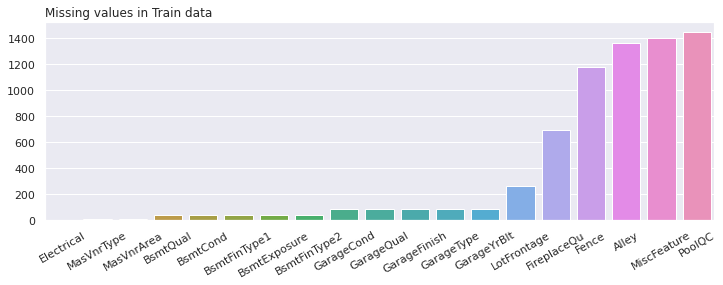

In [ ]:
## Columns with NUll values in Train
fig = plt.figure(figsize=(12,8))

ax1 = fig.add_subplot(2,1,1)
train_mising = train.isnull().sum()
train_mising = train_mising[train_mising > 0]
train_mising.sort_values(inplace=True)
sns.barplot(train_mising.index,train_mising,ax=ax1)
ax1.set_xticklabels(train_mising.index,rotation=30)
ax1.set_title("Missing values in Train data",loc='left')

plt.show()

**Fill in the Missing values based on analysis** 

In [ ]:
# Create methods for filling missing data
def fillNAmean(data,columnslist):
  # Fill the missing values with mean
  for col in columnslist:
    data.loc[:, col] = data.loc[:, col].fillna(np.mean(data.loc[:, col]))      

def fillNAmode(data,columnslist):
  # Fill the missing values with mode 
  for col in columnslist:
    data.loc[:, col] = data.loc[:, col].fillna(data.loc[:, col].mode()[0])

def fillNA(data,columnslist,var):
  # Fill the missing values with string 
  for col in columnslist:
    data.loc[:, col] = data.loc[:, col].fillna(var)


In [ ]:
##******************************************************************************************************##
fillmean = ['GarageArea','GarageCars','TotalBsmtSF','BsmtUnfSF','BsmtFinSF1','BsmtFinSF2']
# Fill Train data and Test data
fillNAmean(train,fillmean)

##******************************************************************************************************##
fillmode = ['Exterior1st','Exterior2nd','KitchenQual','SaleType','Utilities','Functional', \
                 'BsmtHalfBath','BsmtFullBath','MSZoning','Electrical']
# Fill train and test missing value with mode
fillNAmode(train,fillmode)

##******************************************************************************************************##

# For below columns 'NA' mean 'No'
fill_No = ['PoolQC','MiscFeature','Alley','Fence','FireplaceQu','GarageType','GarageFinish','GarageQual',\
           'GarageCond','BsmtFinType2','BsmtFinType1','BsmtExposure','BsmtCond','BsmtQual','MasVnrType']
fillNA(train,fill_No,var='No')

##******************************************************************************************************##

# For below numerical columns 'NA' can be filled with 0
fill_zero = ['LotFrontage','MasVnrArea']
fillNA(train,fill_zero,var=0)


##******************************************************************************************************##

# GarageYrBlt - fill GarageYrBlt with YearBlt value assuming those two would be same in most cases
# Train
train.loc[:, "GarageYrBlt"] = np.where(train.loc[:, "GarageYrBlt"].isnull(),train.loc[:, "YearBuilt"] \
                                       , train.loc[:, "GarageYrBlt"])



In [ ]:
## Missing Values in Train
print(f"Train NAs: {train.isnull().values.any()}")

Train NAs: False


**Numerical Feature Engineering**

In [ ]:
Num_features_cols = train.select_dtypes(include=np.number).columns
train[Num_features_cols].head(2)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500


In [ ]:
## Methods to update the numerical features
def changeDtype(data,cols):
  data[cols] = data[cols].astype('object')

from sklearn.preprocessing import PolynomialFeatures
def polynomial(data,colslist):
  poly = PolynomialFeatures(degree=3,interaction_only=False)
  poly_features = poly.fit_transform(data[colslist])
  return pd.DataFrame(poly_features,index=range(0,poly_features.shape[0]),columns=range(0,poly_features.shape[1]))


In [ ]:
train.isnull().values.any()

False

**Create New Interaction Features Variables**

In [ ]:
# Get the top 15 correlated features using Train dataset
print("Find most important features relative to target")
corr = train.corr()
corr.sort_values(["SalePrice"], ascending = False, inplace = True)
top_15 = []
for (i,cor) in enumerate(list(corr.SalePrice.index)):
  if i >0:
    top_15.append(cor)
    if i > 14: break      
print(top_15)

Find most important features relative to target
['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'GarageArea', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'MasVnrArea', 'Fireplaces', 'BsmtFinSF1', 'OpenPorchSF']


In [ ]:
# Create the Polynomial features
poly_df = polynomial(train,top_15)
## Merge the Polynomial features to the train dataset 
train1= pd.concat([train,poly_df], axis=1)

In [ ]:
train1.shape

(1456, 896)

**Check Skewness of Numerical Variables**

In [ ]:
# Find the skewness (if any) for all the numerical columns
num_features_list2 = list(train1.select_dtypes(exclude='object').columns)

In [ ]:
# Create list of features with skewness more than 0.5
cols_skewness = train1[num_features_list2].skew(axis=0)
cols_skewness = cols_skewness[abs(cols_skewness) > 0.5]
skewed_features = cols_skewness.index

In [ ]:
## Tranform the numerical features for which skewness is more than 0.5
def skewtranform(data,skewed_features):
  data[skewed_features] = np.log1p(data[skewed_features])
  print(f"Total skewed features {skewed_features.shape[0]}")

# Tranform the Train dataset
skewtranform(train1,skewed_features)

Total skewed features 782


**Standardize all the numerical features**

In [ ]:
## Standardize the numerical features
from sklearn.preprocessing import StandardScaler
s = StandardScaler()
train1.loc[:, num_features_list2] = s.fit_transform(train1.loc[:, num_features_list2])

**Caterogical Feature dummy encoding**

In [ ]:
## List of categorical variables
cat_features_list2 = list(train1.select_dtypes(include='object').columns)

#create Dummy variables
train2 = pd.get_dummies(train1,columns=cat_features_list2,drop_first=True)

**Log Tranformation of Target Variable to fix the skewness**

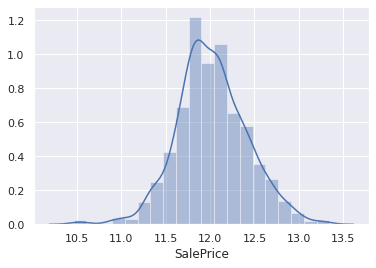

In [ ]:
## ****** Log Transformation of target SalePrice *******
#Taking log for SalePrice as the Salesprice is skewed..Also the rate of increase in salesprice 
# with GRLivArea increases aas GRLivarea increa
y = np.log(y)
## Check the distrbution graph
sns.set(rc={'figure.figsize':(6,4)})
sns.distplot(y, kde=True, bins=20)

# Model Development

**Score function**

In [ ]:
# Define error measure for official scoring : RMSE
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.model_selection import cross_val_score
scorer = make_scorer(mean_squared_error, greater_is_better = False)
def rmse_cv(model,data):
    rmse= np.sqrt(-cross_val_score(model, data, y, scoring = scorer, cv = 10))
    return(rmse)

**Ridge Linear Regression**

In [ ]:
from sklearn.linear_model import RidgeCV
ridge = RidgeCV(alphas = [0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6, 10, 30, 60])
ridge.fit(train2, y)
alpha = ridge.alpha_
print("Best alpha :", alpha)

Best alpha : 0.01


In [ ]:
## Use the best alpha value from above to try more alpha values

print("Try again for more precision with alphas centered around " + str(alpha))
ridge = RidgeCV(alphas = [alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, alpha * .85, 
                          alpha * .9, alpha * .95, alpha, alpha * 1.05, alpha * 1.1, alpha * 1.15,
                          alpha * 1.25, alpha * 1.3, alpha * 1.35, alpha * 1.4], 
                cv = 10)
ridge.fit(train2, y)
alpha = ridge.alpha_
print("Best alpha :", alpha)
y_train_rdg = ridge.predict(train2)
print("Ridge RMSE on Training set :", rmse_cv(ridge,train2).mean())
#print("Ridge RMSE on Test set :", rmse_cv_test(ridge).mean())

Try again for more precision with alphas centered around 0.006
Best alpha : 0.0036
Ridge RMSE on Training set : 1.4922087725362497e-05


In [ ]:
pred =ridge.predict(Xtest)

In [ ]:
pred = np.exp(pred)

In [ ]:
pred

array([118767.57792314, 156161.11052441, 183159.56509456, ...,
       172605.80572504, 117602.53494302, 226938.1158969 ])

In [ ]:
sample = pd.read_csv("sample_submission.csv")

In [ ]:
sample['SalePrice'] = pred

In [ ]:
sample.to_csv("sample_submission.csv",index=False)

# Prediction

**Preprocess Test data**

In [ ]:
## Load test data       
test = pd.read_csv("test.csv")
#

In [ ]:
# Missing data in Test dataset
test_mising = test.isnull().sum()
test_mising = test_mising[test_mising > 0]
test_mising=test_mising.sort_values(inplace=True)
test_mising.barplot()

In [ ]:
# Fill in the missing values
fillNAmean(test,fillmean)
fillNAmode(test,fillmode)
fillNA(test,fill_No,var='No')
fillNA(test,fill_zero,var=0)
test.loc[:, "GarageYrBlt"] = np.where(test.loc[:, "GarageYrBlt"].isnull(),test.loc[:, "YearBuilt"] \
                                       , test.loc[:, "GarageYrBlt"])

